In [1]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('creditcardfraud.csv')#reading creditcardfraud.csv file from file path dataset related to policy and claim,,wwther the policy holder will claim or not
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [2]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [3]:
df.drop(columns=['Unnamed: 0','trans_date_trans_time','cc_num','first','last','gender',
                'street','city','state','zip','dob','trans_num','unix_time'],inplace=True)

In [4]:
x=df.drop(columns=['is_fraud'])
y=df['is_fraud']

In [5]:
x.columns

Index(['merchant', 'category', 'amt', 'lat', 'long', 'city_pop', 'job',
       'merch_lat', 'merch_long'],
      dtype='object')

In [6]:
def read_data():#defining afunction so that we can get inout from user 
    merchant=input('Enter Merchant Name: ')
    category=input('Enter Category Name: ')
    amount=float(input('Enter amount: '))
    lat=float(input('Enter Latitude: '))
    long=float(input('Enter Longitude: '))
    city_population=float(input('Enter City population: '))
    job=input('Enter Job Details: ')
    merch_lat=float(input('Enter Merchant Latitude: '))
    merch_long=float(input('Enter Merchant Longitude: '))
    
    user_data={'merchant':{0:merchant},#creating a dictionary as we can store dtat as dataframe after acepting from user
              'category':{0:category},
              'amt':{0:amount},
              'lat':{0:lat},
              'long':{0:long},
              'city_pop':{0:city_population},
              'job':{0:job},
              'merch_lat':{0:merch_lat},
              'merch_long':{0:merch_long}}
    user_data=pd.DataFrame(user_data)
    return user_data

In [7]:
x.isna().sum()#checking for null values

merchant      0
category      0
amt           0
lat           0
long          0
city_pop      0
job           0
merch_lat     0
merch_long    0
dtype: int64

In [8]:
x.shape

(1296675, 9)

In [9]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   merchant    1296675 non-null  object 
 1   category    1296675 non-null  object 
 2   amt         1296675 non-null  float64
 3   lat         1296675 non-null  float64
 4   long        1296675 non-null  float64
 5   city_pop    1296675 non-null  int64  
 6   job         1296675 non-null  object 
 7   merch_lat   1296675 non-null  float64
 8   merch_long  1296675 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 89.0+ MB


In [10]:
x.dtypes

merchant       object
category       object
amt           float64
lat           float64
long          float64
city_pop        int64
job            object
merch_lat     float64
merch_long    float64
dtype: object

In [11]:
from sklearn.preprocessing import LabelEncoder
le_merchant=LabelEncoder()
x['merchant']=le_merchant.fit_transform(x['merchant'])


In [12]:
le_category=LabelEncoder()
x['category']=le_category.fit_transform(x['category'])#create different Label Encoder for different columns in data frame

In [13]:
le_job=LabelEncoder()
x['job']=le_job.fit_transform(x['job'])

In [14]:
x.dtypes

merchant        int32
category        int32
amt           float64
lat           float64
long          float64
city_pop        int64
job             int32
merch_lat     float64
merch_long    float64
dtype: object

<Axes: >

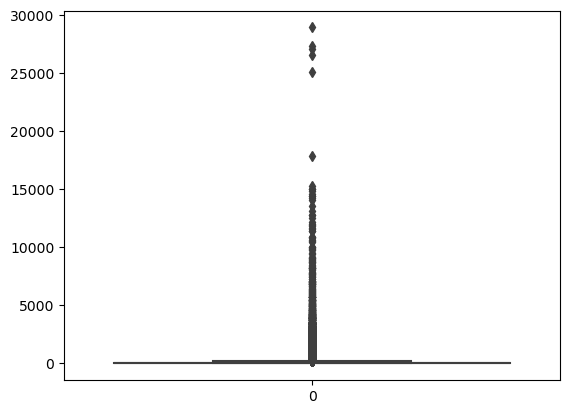

In [15]:
import seaborn as sns

sns.boxplot(x['amt'])

<Axes: >

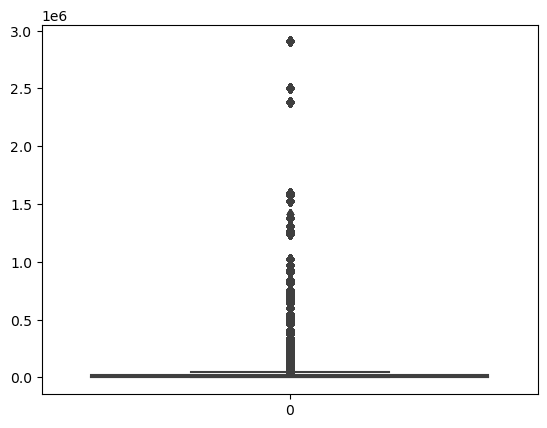

In [16]:
sns.boxplot(x['city_pop'])

In [17]:
x['amt'].skew()

42.277873790051174

In [18]:
x['city_pop'].skew()

5.593853066842104

In [19]:
from scipy.stats import boxcox
x['amt']=boxcox(x['amt'])[0]

In [20]:
x['amt'].skew()

-0.01554494300041963

In [21]:
x['city_pop']=boxcox(x['city_pop'])[0]

In [22]:
x['city_pop'].skew()

0.05750405771141424

<Axes: >

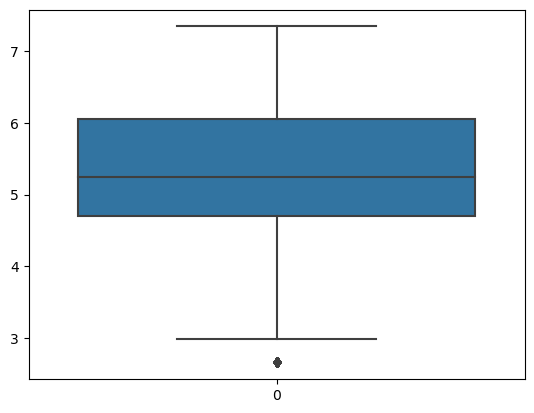

In [23]:
sns.boxplot(x['city_pop'])

<Axes: >

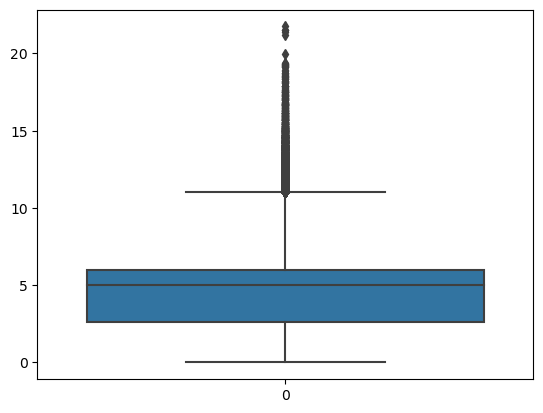

In [24]:
sns.boxplot(x['amt'])

<Axes: >

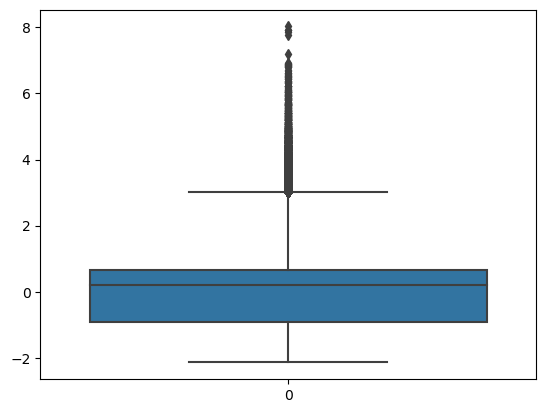

In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x['amt']=scaler.fit_transform(x[['amt']])
sns.boxplot(x['amt'])

In [26]:
y.value_counts()#to check for data is balanced or not

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [27]:
y_zero=x[y==0]#All the rows in x and y where y==0
del_rows=y_zero[(x['amt']>1)|(x['amt']<-1)]
#rows in x where amt column has outliers and also y is zero
x.drop(del_rows.index,axis=0,inplace=True)
y.drop(del_rows.index,axis=0,inplace=True)
y.value_counts()

C:\Users\Admin\AppData\Local\Temp\ipykernel_2984\904207798.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del_rows=y_zero[(x['amt']>1)|(x['amt']<-1)]


is_fraud
0    857798
1      7506
Name: count, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=101)

In [29]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier(max_depth=3)#no of split we can give in argument 
model.fit(xtrain,ytrain)#train the model
trainpred=model.predict(xtrain)#get prediction on train data

In [30]:
from sklearn.metrics import classification_report

print(classification_report(ytrain,trainpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    686287
           1       1.00      0.80      0.89      5956

    accuracy                           1.00    692243
   macro avg       1.00      0.90      0.94    692243
weighted avg       1.00      1.00      1.00    692243



In [31]:
testpred=model.predict(xtest)
print(classification_report(ytest,testpred)) #get prediction on test data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    171511
           1       1.00      0.80      0.89      1550

    accuracy                           1.00    173061
   macro avg       1.00      0.90      0.94    173061
weighted avg       1.00      1.00      1.00    173061



In [32]:
def get_prediction(data):
    data['merchant'] = le_merchant.transform(data['merchant'])
    data['category'] = le_category.transform(data['category'])
    data['job'] = le_job.transform(data['job'])
    amount = data[['amt']].values.reshape(1,-1) # 2 dimension
    data['amt'] = scaler.transform(amount)
    pred = model.predict(data)
    if pred==0:
        print('It is not fraud')
    else:
        print('It is fraud')

In [33]:
df.iloc[0,:].values#pass the data as input in the next cell

array(['fraud_Rippin, Kub and Mann', 'misc_net', 4.97, 36.0788, -81.1781,
       3495, 'Psychologist, counselling', 36.011293, -82.048315, 0],
      dtype=object)

In [34]:
newdata=read_data()
get_prediction(newdata)

Enter Merchant Name: fraud_Rippin, Kub and Mann
Enter Category Name: misc_net
Enter amount:  4.97
Enter Latitude: 36.0788
Enter Longitude: -81.1781
Enter City population: 3495
Enter Job Details: Psychologist, counselling
Enter Merchant Latitude: 36.011293
Enter Merchant Longitude: -82.048315
It is not fraud


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
